## 10-armed Bandit
### Exercise 2.5 (programming) 
Design and conduct an experiment to demonstrate the difficulties that sample-average methods have for nonstationary problems. Use a modified version of the 10-armed testbed in which all the q(a) start out equal and then take independent random walks (say by adding a normally distributed increment with mean 0 and standard deviation 0.01 to all the q(a) on each step). Prepare plots like Figure 2.2 for an action-value method using sample averages, incrementally computed, and another action-value method using a constant step-size parameter, $\alpha$ = 0.1. 
Use $\epsilon$ = 0.1 and longer runs, say of 10,000 steps. 

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [45]:
N = 100    # number of trials
T = 10000    # number of steps per trial
k = 10    # arms of the bandit
epsilon = 0.1    # chance of non-greedy action
sig = 0.1    # stdev for reward

def update_q(q):
    mu = 0
    sig = 0.01
    return q + np.random.normal(mu, sig, size=q.shape)

def update_values(Qn, Rn, step):
    return Qn + step * (Rn - Qn)

def choose_action(Qn, epsilon):
    if (np.random.rand(1)[0] > epsilon):
        return np.argmax(Qn)
    else:
        return int(np.floor(np.random.rand(1)[0] * Qn.size)) # return random action

# First experiment: Sample average method

avg_reward_1 = np.zeros(T)
percent_optimal_1 = np.zeros(T)
step = lambda n: 1.0 / n

for i in range(N):
    q = np.zeros(k)    # actual values
    Q = np.zeros(k)    # estimated values
    N_a = np.zeros(k)    # number of times action is taken
    optimal = 0
    if (i % 25 == 0):
        print(i)
    for j in range(T):
        action = choose_action(Q, epsilon)
        if (action != np.argmax(Q)):
            optimal = 0
        else:
            optimal = 100
        N_a[action] = N_a[action] + 1
        reward = np.random.normal(q[action], sig, 1)[0]
        Q = update_values(Q, reward, step(N_a[action]))
        q = update_q(q)
        avg_reward_1[j] = update_values(avg_reward_1[j], reward, step(i+1))
        percent_optimal_1[j] = update_values(percent_optimal_1[j], optimal, step(i+1))

# Second experiment: constant step-size method

avg_reward_2 = np.zeros(T)
percent_optimal_2 = np.zeros(T)
step = lambda n: 1.0 / n
alpha = 0.1

for i in range(N):
    q = np.zeros(k)    # actual values
    Q = np.zeros(k)    # estimated values
    N_a = np.zeros(k)    # number of times action is taken
    optimal = 0
    if (i % 25 == 0):
        print(i)
    for j in range(T):
        action = choose_action(Q, epsilon)
        if (action != np.argmax(Q)):
            optimal = 0
        else:
            optimal = 100
        N_a[action] = N_a[action] + 1
        reward = np.random.normal(q[action], sig, 1)[0]
        Q = update_values(Q, reward, alpha)
        q = update_q(q)
        avg_reward_2[j] = update_values(avg_reward_2[j], reward, step(i+1))
        percent_optimal_2[j] = update_values(percent_optimal_2[j], optimal, step(i+1))


0
25
50
75
0
25
50
75


Text(0, 0.5, '% Optimal Action')

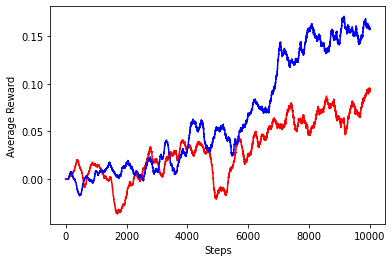

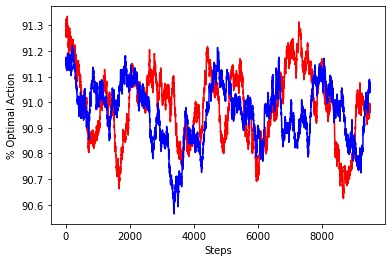

In [66]:
%matplotlib inline

def rolling_average(data, window_width):
    csum_vec = np.cumsum(np.insert(data, 0, 0)) 
    return (csum_vec[window_width:] - csum_vec[:-window_width]) / window_width

plt.figure()
#plt.plot(range(T), avg_reward_1, 'r')
plt.plot(range(T), np.concatenate((np.zeros(99), rolling_average(avg_reward_1, 100))), 'r')
#plt.plot(range(T), avg_reward_2, 'b')
plt.plot(range(T), np.concatenate((np.zeros(99), rolling_average(avg_reward_2, 100))), 'b')
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.figure()
#plt.plot(range(T), percent_optimal_1, 'r')
plt.plot(range(T-499), rolling_average(percent_optimal_1, 500), 'r')
#plt.plot(range(T), percent_optimal_2, 'b')
plt.plot(range(T-499), rolling_average(percent_optimal_2, 500), 'b')
plt.xlabel("Steps")
plt.ylabel("% Optimal Action")